# Research notebook for ISAHP2022 Workshop

This is where I first worked through calculations for the official Jupyter notebook results.  These are less organized and more exploratory.  I will try to include reasonable comments and text to help both myself and others to read this.

## Imports needed

In [1]:
from pyanp import limitmatrix as lm
from pyanp import anp as anp
from pyanp import rowsens as rowsens
import numpy as np
import pandas as pd
from IPython.display import Math, HTML

## Some custom functions

In [2]:
from isahp2022 import *

# First model, code named m1

This network has 5 nodes, 3 criteria and 2 alternatives.  The layout is:

* Criteria: N1, N2, N3
* Alternatives: A1, A2
* The order in all of the supermatrices is N1,N2,N3,A1,A2

In the first version of the model we have a fully connect model.  I include the unscaled supermatrix, cluster matrix and scaled supermatrix first

## For presentation fully connect

This model is designed with the following ideas:
* A1 beats A2 for every node except N2
* N2 has N3 as the most important criteria, and N3 has A1 win, but not by much
* Therefore, when we do sensitivity on N2 upward, we should see a big change

In [3]:
alts=[3,4]
m1unscaled = np.array([
    [0.60, 0.20, 0.40, 0.20, 0.10],
    [0.30, 0.20, 0.35, 0.30, 0.30],
    [0.10, 0.60, 0.25, 0.50, 0.60],
    [0.20, 0.90, 0.40, 0.30, 0.25],
    [0.80, 0.10, 0.60, 0.70, 0.75]
])
m1cluster = np.array([
    [0.8, 0.6],
    [0.2, 0.4]
])
m1scaled = scale_mat(m1unscaled, m1cluster, [3,2])
m1limit = lm.calculus(m1scaled)

In [4]:
print(m1scaled)
print(m1limit)

[[0.48 0.16 0.32 0.12 0.06]
 [0.24 0.16 0.28 0.18 0.18]
 [0.08 0.48 0.2  0.3  0.36]
 [0.04 0.18 0.08 0.12 0.1 ]
 [0.16 0.02 0.12 0.28 0.3 ]]
[[0.26903466 0.26903466 0.26903466 0.26903466 0.26903466]
 [0.21807019 0.21807019 0.21807019 0.21807019 0.21807019]
 [0.26289515 0.26289515 0.26289515 0.26289515 0.26289515]
 [0.09800575 0.09800575 0.09800575 0.09800575 0.09800575]
 [0.15199425 0.15199425 0.15199425 0.15199425 0.15199425]]


In [5]:
lmsynth(m1scaled, alts)

array([0.39202299, 0.60797701])

In [6]:
m1scaledUpRow1_075=rowsens.row_adjust(m1scaled, 1, 0.75, p0mode=0.5)
m1scaledDownRow0_01=rowsens.row_adjust(m1scaled, 0, 0.1, p0mode=0.5)
m1scaledDownRow1_025=rowsens.row_adjust(m1scaled, 1, 0.25, p0mode=0.5)
m1scaledDownRow1_025_limit=lm.calculus(m1scaledDownRow1_025)
m1scaledUpRow1_075_limit = lm.calculus(m1scaledUpRow1_075)
print(m1scaledDownRow1_025)
print(m1scaledUpRow1_075)
print(m1scaledDownRow0_01)
print(m1scaledDownRow1_025_limit)
print(m1scaledUpRow1_075_limit)

[[0.55578947 0.1752381  0.38222222 0.13317073 0.06658537]
 [0.12       0.08       0.14       0.09       0.09      ]
 [0.09263158 0.52571429 0.23888889 0.33292683 0.3995122 ]
 [0.04631579 0.19714286 0.09555556 0.13317073 0.11097561]
 [0.18526316 0.02190476 0.14333333 0.31073171 0.33292683]]
[[0.24 0.08 0.16 0.06 0.03]
 [0.62 0.58 0.64 0.59 0.59]
 [0.04 0.24 0.1  0.15 0.18]
 [0.02 0.09 0.04 0.06 0.05]
 [0.08 0.01 0.06 0.14 0.15]]
[[0.096      0.032      0.064      0.024      0.012     ]
 [0.41723077 0.18438095 0.38541176 0.19963636 0.18919149]
 [0.13907692 0.55314286 0.27529412 0.33272727 0.37838298]
 [0.06953846 0.20742857 0.11011765 0.13309091 0.10510638]
 [0.27815385 0.02304762 0.16517647 0.31054545 0.31531915]]
[[0.32976262 0.32976262 0.32976262 0.32976262 0.32976262]
 [0.1119541  0.1119541  0.1119541  0.1119541  0.1119541 ]
 [0.26361532 0.26361532 0.26361532 0.26361532 0.26361532]
 [0.09739677 0.09739677 0.09739677 0.09739677 0.09739677]
 [0.19727119 0.19727119 0.19727119 0.19727119

In [7]:
# Scaling up row 1 makes alt A1 win.  
# Even though all of the other nodes have A2 win!
print(lmsynth(m1scaled, alts))
print(lmsynth(m1scaledUpRow1_075, alts))
print(lmsynth(m1scaledDownRow1_025, alts))

[0.39202299 0.60797701]
[0.62511897 0.37488103]
[0.33053056 0.66946944]


In [8]:
# Criteria row 0 has A2 win by most, so decreasing the importance of N1 (row 0)
# makes A2 win by less.  Decreasing N1 proportionally adds weight to N2, which 
# helps make this change a bit more dramatic, but it still isn't a lot
lmsynth(m1scaledDownRow0_01, alts)

array([0.43521556, 0.56478444])

## Same as before, but removing N3->N1 connection

* Since $N3 \to N1$ connection is gone, that influence of N1 making A1 lose is lessened

In [9]:
m1aunscaled = np.array([
    [0.60, 0.20, 0.00/0.60, 0.20, 0.10],
    [0.30, 0.20, 0.35/0.60, 0.30, 0.30],
    [0.10, 0.60, 0.25/0.60, 0.50, 0.60],
    [0.20, 0.90, 0.40,      0.30, 0.25],
    [0.80, 0.10, 0.60,      0.70, 0.75]
])
m1acluster = np.array([
    [0.8, 0.6],
    [0.2, 0.4]
])
m1ascaled = scale_mat(m1aunscaled, m1acluster, [3,2])

In [10]:
lmsynth(m1ascaled,alts)

array([0.44042339, 0.55957661])

In [11]:
m1ascaledUpRow1_075=rowsens.row_adjust(m1ascaled, 1, 0.75, p0mode=0.5)
m1ascaledDownRow0_01=rowsens.row_adjust(m1ascaled, 0, 0.1, p0mode=0.5)
display(m1ascaledUpRow1_075)
display(m1ascaledDownRow0_01)

array([[0.24      , 0.08      , 0.        , 0.06      , 0.03      ],
       [0.62      , 0.58      , 0.73333333, 0.59      , 0.59      ],
       [0.04      , 0.24      , 0.16666667, 0.15      , 0.18      ],
       [0.02      , 0.09      , 0.04      , 0.06      , 0.05      ],
       [0.08      , 0.01      , 0.06      , 0.14      , 0.15      ]])

array([[0.096     , 0.032     , 0.        , 0.024     , 0.012     ],
       [0.41723077, 0.18438095, 0.46666667, 0.19963636, 0.18919149],
       [0.13907692, 0.55314286, 0.33333333, 0.33272727, 0.37838298],
       [0.06953846, 0.20742857, 0.08      , 0.13309091, 0.10510638],
       [0.27815385, 0.02304762, 0.12      , 0.31054545, 0.31531915]])

In [12]:
lmsynth(m1ascaledUpRow1_075, alts)

array([0.64018781, 0.35981219])

In [13]:
lmsynth(m1ascaledDownRow0_01, alts)

array([0.46917138, 0.53082862])

## Same except $N3\to N1$ and $N1\to N1$ connections removed

* Since 2 connections to N1 have disappeared, this makes N2 more important, and lessens the victory of N1 in the network

In [14]:
m1bunscaled = np.array([
    [0.00/0.40, 0.20, 0.00/0.60, 0.20, 0.10],
    [0.30/0.40, 0.20, 0.35/0.60, 0.30, 0.30],
    [0.10/0.40, 0.60, 0.25/0.60, 0.50, 0.60],
    [0.20, 0.90,      0.40,      0.30, 0.25],
    [0.80, 0.10,      0.60,      0.70, 0.75]
])
m1bcluster = np.array([
    [0.8, 0.6],
    [0.2, 0.4]
])
m1bscaled = scale_mat(m1bunscaled, m1bcluster, [3,2])

In [15]:
lmsynth(m1bscaled,alts)

array([0.46163436, 0.53836564])

In [16]:
m1bscaledUpRow1_075=rowsens.row_adjust(m1bscaled, 1, 0.75, p0mode=0.5)
m1bscaledDownRow0_01=rowsens.row_adjust(m1bscaled, 0, 0.1, p0mode=0.5)
display(m1bscaledUpRow1_075)
display(m1bscaledDownRow0_01)

array([[0.        , 0.08      , 0.        , 0.06      , 0.03      ],
       [0.8       , 0.58      , 0.73333333, 0.59      , 0.59      ],
       [0.1       , 0.24      , 0.16666667, 0.15      , 0.18      ],
       [0.02      , 0.09      , 0.04      , 0.06      , 0.05      ],
       [0.08      , 0.01      , 0.06      , 0.14      , 0.15      ]])

array([[0.        , 0.032     , 0.        , 0.024     , 0.012     ],
       [0.6       , 0.18438095, 0.46666667, 0.19963636, 0.18919149],
       [0.2       , 0.55314286, 0.33333333, 0.33272727, 0.37838298],
       [0.04      , 0.20742857, 0.08      , 0.13309091, 0.10510638],
       [0.16      , 0.02304762, 0.12      , 0.31054545, 0.31531915]])

In [17]:
lmsynth(m1bscaledUpRow1_075, alts)

array([0.64784354, 0.35215646])

In [18]:
lmsynth(m1bscaledDownRow0_01, alts)

array([0.47374771, 0.52625229])

# Calculations for workshop

## This section has the matrices I copied into the presentation at each step

### Scaling down

$$\begin{bmatrix}
0.48 & 0.16 & 0.32 &0.12 &0.06 \\
0.24 &0.16 &0.28 &0.18 &0.18 \\
0.08 &0.48 &0.2 & 0.3 & 0.36 \\
0.04 & 0.18 & 0.08 & 0.12 & 0.1 \\
0.16 & 0.02 & 0.12 & 0.28 &0.3 
\end{bmatrix}$$

$$\begin{bmatrix}
0.48 & 0.16 & 0.32 &0.12 &0.06 \\
1/2\cdot 0.24 &1/2\cdot 0.16 &1/2\cdot 0.28 &1/2\cdot 0.18 &1/2\cdot 0.18 \\
0.08 &0.48 &0.2 & 0.3 & 0.36 \\
0.04 & 0.18 & 0.08 & 0.12 & 0.1 \\
0.16 & 0.02 & 0.12 & 0.28 &0.3 
\end{bmatrix}$$

$$\begin{bmatrix}
0.48 & 0.16 & 0.32 &0.12 &0.06 \\
0.12 & 0.08 & 0.14 & 0.09 &0.09 \\
0.08 &0.48 &0.2 & 0.3 & 0.36 \\
0.04 & 0.18 & 0.08 & 0.12 & 0.1 \\
0.16 & 0.02 & 0.12 & 0.28 &0.3 
\end{bmatrix}$$

$$\begin{bmatrix}
0.88/0.76 \cdot 0.48 & 0.16 & 0.32 &0.12 &0.06 \\
0.12 & 0.08 & 0.14 & 0.09 &0.09 \\
0.88/0.76 \cdot 0.08 &0.48 &0.2 & 0.3 & 0.36 \\
0.88/0.76 \cdot 0.04 & 0.18 & 0.08 & 0.12 & 0.1 \\
0.88/0.76 \cdot 0.16 & 0.02 & 0.12 & 0.28 &0.3 
\end{bmatrix}$$

$$\begin{bmatrix}
0.5558& 0.16 & 0.32 &0.12 &0.06 \\
0.12 & 0.08 & 0.14 & 0.09 &0.09 \\
0.0926 &0.48 &0.2 & 0.3 & 0.36 \\
0.0463 & 0.18 & 0.08 & 0.12 & 0.1 \\
0.1853 & 0.02 & 0.12 & 0.28 &0.3 
\end{bmatrix}$$

$$\begin{bmatrix}
0.5558& 0.92/0.84 \cdot 0.16 & 0.32 &0.12 &0.06 \\
0.12 & 0.08 & 0.14 & 0.09 &0.09 \\
0.0926 &0.92/0.84 \cdot 0.160.48 &0.2 & 0.3 & 0.36 \\
0.0463 &0.92/0.84 \cdot 0.16 0.18 & 0.08 & 0.12 & 0.1 \\
0.1853 & 0.92/0.84 \cdot 0.160.02 & 0.12 & 0.28 &0.3 
\end{bmatrix}$$

$$\begin{bmatrix}
0.5558& 0.1752 & 0.32 &0.12 &0.06 \\
0.12 & 0.08 & 0.14 & 0.09 &0.09 \\
0.0926 &0.5257 &0.2 & 0.3 & 0.36 \\
0.0463 & 0.9171 & 0.08 & 0.12 & 0.1 \\
0.1853 & 0.0219 & 0.12 & 0.28 &0.3 
\end{bmatrix}$$

$$\begin{bmatrix}
0.5558& 0.1752 & 0.92/0.84 \cdot 0.32 &0.12 &0.06 \\
0.12 & 0.08 &  0.14 & 0.09 &0.09 \\
0.0926 &0.5257 & 0.92/0.84 \cdot 0.2 & 0.3 & 0.36 \\
0.0463 & 0.9171 &  0.92/0.84 \cdot 0.08 & 0.12 & 0.1 \\
0.1853 & 0.0219 & 0.92/0.84 \cdot 0.12 & 0.28 &0.3 
\end{bmatrix}$$

$$\begin{bmatrix}
0.5558& 0.1752 & 0.3822 &0.12 &0.06 \\
0.12 & 0.08 & 0.14 & 0.09 &0.09 \\
0.0926 &0.5257 &0.2389 & 0.3 & 0.36 \\
0.0463 & 0.9171 & 0.0956 & 0.12 & 0.1 \\
0.1853 & 0.0219 & 0.1433 & 0.28 &0.3 
\end{bmatrix}$$

$$\begin{bmatrix}
0.5558& 0.1752 & 0.3822 & 0.91/0.82 \cdot 0.12 &0.06 \\
0.12 & 0.08 & 0.14 & 0.09 &0.09 \\
0.0926 &0.5257 &0.2389 & 0.91/0.82 \cdot 0.3 & 0.36 \\
0.0463 & 0.9171 & 0.0956 & 0.91/0.82 \cdot 0.12 & 0.1 \\
0.1853 & 0.0219 & 0.1433 & 0.91/0.82 \cdot 0.28 &0.3 
\end{bmatrix}$$

$$\begin{bmatrix}
0.5558& 0.1752 & 0.32 &0.1332 &0.06 \\
0.12 & 0.08 & 0.14 & 0.09 &0.09 \\
0.0926 &0.5257 &0.2 & 0.3329 & 0.36 \\
0.0463 & 0.9171 & 0.08 & 0.1332 & 0.1 \\
0.1853 & 0.0219 & 0.12 & 0.3107 &0.3 
\end{bmatrix}$$

$$\begin{bmatrix}
0.5558& 0.1752 & 0.32 &0.1332 &0.91/0.82 \cdot 0.06 \\
0.12 & 0.08 & 0.14 & 0.09 &0.09 \\
0.0926 &0.5257 &0.2 & 0.3329 & 0.91/0.82 \cdot 0.36 \\
0.0463 & 0.9171 & 0.08 & 0.1332 & 0.91/0.82 \cdot 0.1 \\
0.1853 & 0.0219 & 0.12 & 0.3107 &0.91/0.82 \cdot 0.3 
\end{bmatrix}$$

$$\begin{bmatrix}
0.5558& 0.1752 & 0.32 &0.1332 &0.0666 \\
0.12 & 0.08 & 0.14 & 0.09 &0.09 \\
0.0926 &0.5257 &0.2 & 0.3329 & 0.3995 \\
0.0463 & 0.9171 & 0.08 & 0.1332 & 0.1110 \\
0.1853 & 0.0219 & 0.12 & 0.3107 &0.3329 
\end{bmatrix}$$

In [19]:
np.set_printoptions(precision=4)
print(m1scaledDownRow1_025)
print(m1scaled)

[[0.5558 0.1752 0.3822 0.1332 0.0666]
 [0.12   0.08   0.14   0.09   0.09  ]
 [0.0926 0.5257 0.2389 0.3329 0.3995]
 [0.0463 0.1971 0.0956 0.1332 0.111 ]
 [0.1853 0.0219 0.1433 0.3107 0.3329]]
[[0.48 0.16 0.32 0.12 0.06]
 [0.24 0.16 0.28 0.18 0.18]
 [0.08 0.48 0.2  0.3  0.36]
 [0.04 0.18 0.08 0.12 0.1 ]
 [0.16 0.02 0.12 0.28 0.3 ]]


In [20]:
m1scaledDownRow1_025.sum(axis=0)

array([1., 1., 1., 1., 1.])

### Attempting to scale upward incorrectly

$$\begin{bmatrix}
0.48 & 0.16 & 0.32 &0.12 &0.06 \\
0.8571& 0.5714 & 1.    & 0.6429 & 0.6429 \\
0.08 &0.48 &0.2 & 0.3 & 0.36 \\
0.04 & 0.18 & 0.08 & 0.12 & 0.1 \\
0.16 & 0.02 & 0.12 & 0.28 &0.3 
\end{bmatrix}$$

### Now scaling upward correctly

$$\begin{bmatrix}
0.48 & 0.16 & 0.32 &0.12 &0.06 \\
0.62 & 0.58 & 0.64 & 0.59 & 0.59 \\
0.08 &0.48 &0.2 & 0.3 & 0.36 \\
0.04 & 0.18 & 0.08 & 0.12 & 0.1 \\
0.16 & 0.02 & 0.12 & 0.28 &0.3 
\end{bmatrix}$$

$$\begin{bmatrix}
0.24 & 0.08 & 0.16 &0.06 &0.03 \\
0.62 & 0.58 & 0.64 & 0.59 & 0.59 \\
0.04 &0.24 &0.1 & 0.15 & 0.18 \\
0.02 & 0.09 & 0.04 & 0.06 & 0.05 \\
0.08 & 0.01 & 0.06 & 0.14 &0.15 
\end{bmatrix}$$

Limit matrix of the original matrix
$$\begin{bmatrix}
0.269 & 0.269 & 0.269 & 0.269 & 0.269\\ 
0.2181& 0.2181 &0.2181 &0.2181 &0.2181\\
0.2629& 0.2629 &0.2629 &0.2629 &0.2629\\
0.098 & 0.098  &0.098  &0.098  &0.098 \\
0.152 & 0.152  &0.152  &0.152  &0.152 
\end{bmatrix}$$

Limit after scaling down row 2 to p=1/4 with p0=1/2:

$$\begin{bmatrix}
0.3298 &0.3298 &0.3298 &0.3298 &0.3298\\
0.112  &0.112  &0.112  &0.112  &0.112 \\
0.2636 &0.2636 &0.2636 &0.2636 &0.2636\\
0.0974 &0.0974 &0.0974 &0.0974 &0.0974\\
0.1973 &0.1973 &0.1973 &0.1973 &0.1973
\end{bmatrix}$$

Limit after scaling up row 2 to p=3/4 with p0=1/2:
$$\begin{bmatrix}
0.1086 &0.1086 &0.1086 &0.1086 &0.1086\\
0.5965 &0.5965 &0.5965 &0.5965 &0.5965\\
0.1838 &0.1838 &0.1838 &0.1838 &0.1838\\
0.0695 &0.0695 &0.0695 &0.0695 &0.0695\\
0.0417 &0.0417 &0.0417 &0.0417 &0.0417
\end{bmatrix}$$

# Sensitivity calcs

/Users/wjadams/mambaforge/lib/python3.9/site-packages/pyanp/rowsens.py:301: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pvals = pd.Series()
/Users/wjadams/mambaforge/lib/python3.9/site-packages/pyanp/rowsens.py:335: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for label, pval in pvals.iteritems():


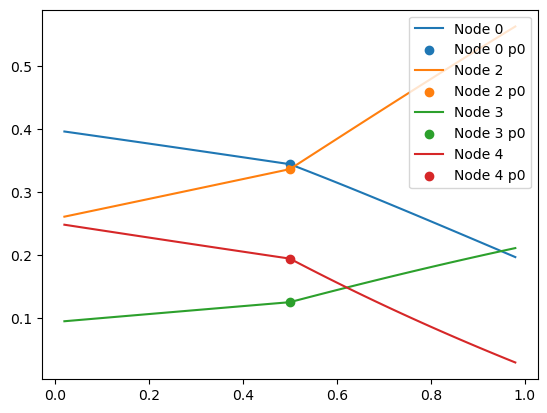

In [21]:
rowsens.influence_table(m1scaled, 1, p0mode=0.5)

In [22]:
rowsens.influence_fixed(m1scaled, 1, p0mode=0.5, delta=0.1)

0   -0.022804
2    0.037462
3    0.015054
4   -0.029711
dtype: float64

In [23]:
rowsens.influence_marginal(m1scaled, 1, left_or_right=1)

0   -0.730963
1    1.478213
2   -0.122250
3   -0.032094
4   -0.592906
dtype: float64

In [24]:
rowsens.influence_limit(m1scaled, 1, p0mode=0.5)

/Users/wjadams/mambaforge/lib/python3.9/site-packages/pyanp/rowsens.py:399: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  limits = pd.Series()
/Users/wjadams/mambaforge/lib/python3.9/site-packages/pyanp/rowsens.py:401: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  p0s = pd.Series()


(Node 0    0.190477
 Node 2    0.336213
 Node 3    0.125338
 Node 4    0.194383
 dtype: float64,
 Node 0    0.5
 Node 2    0.5
 Node 3    0.5
 Node 4    0.5
 dtype: float64)

In [25]:
# Let's look at the limit priority
original = lmsynth(m1scaled, alts)
print("Original priorities were: "+str(original))
for val in [0.5, 0.501, 0.51, 0.55, 0.6, 0.75, 0.8, 0.9, 0.95, 0.99, 0.999]:
    npris = influence_priority(m1scaled, 1, val, alts, p0mode=0.5)
    print("p="+str(val)+" new_scores: "+str(npris))

Original priorities were: [0.392 0.608]
p=0.5 new_scores: [0.392 0.608]
p=0.501 new_scores: [0.3929 0.6071]
p=0.51 new_scores: [0.4006 0.5994]
p=0.55 new_scores: [0.4354 0.5646]
p=0.6 new_scores: [0.4804 0.5196]
p=0.75 new_scores: [0.6251 0.3749]
p=0.8 new_scores: [0.6767 0.3233]
p=0.9 new_scores: [0.7848 0.2152]
p=0.95 new_scores: [0.8415 0.1585]
p=0.99 new_scores: [0.8882 0.1118]
p=0.999 new_scores: [0.8988 0.1012]


In [26]:
for node in [0,1,2]:
    infl_right = rowsens.influence_marginal(m1scaled, node, left_or_right=1)
    infl_left = rowsens.influence_marginal(m1scaled, node, left_or_right=0)
    display(HTML("<h2>Node "+str(node)+"</h2>"))
    df = pd.DataFrame({"Left":infl_left, "Right":infl_right})
    new_index = len(df)
    df.loc[len(df)] = [np.linalg.norm(infl_left), np.linalg.norm(infl_right)]
    df.rename(index={5:"Total"}, inplace=True)
    display(df)

,Left,Right
0,1.363634,1.986966
1,-0.299029,-0.404571
2,-0.637174,-0.957396
3,-0.225392,-0.335150
4,-0.202039,-0.289850
Total,1.564138,2.285751


,Left,Right
0,-0.479561,-0.730963
1,0.945442,1.478213
2,-0.068759,-0.122250
3,-0.017545,-0.032094
4,-0.379577,-0.592906
Total,1.128252,1.756967


,Left,Right
0,-0.241685,-0.402652
1,-0.216689,-0.319227
2,0.907227,1.346879
3,-0.178573,-0.228906
4,-0.270280,-0.396093
Total,1.016547,1.512417


In [27]:
for node in [0, 1, 2]:
    infl_050 = influence_priority(m1scaled, node, 0.5, alts, p0mode=0.5)
    infl_075 = influence_priority(m1scaled, node, 0.75, alts, p0mode=0.5)
    diff075=infl_075-infl_050
    infl_090 = influence_priority(m1scaled, node, 0.90, alts, p0mode=0.5)
    diff090=infl_090-infl_050
    display(HTML("<h2>Node "+str(node)+"</h2>"))
    df = pd.DataFrame({"0.50":infl_050, "0.75":diff075, "0.90":diff090})
    new_index = len(df)
    df.loc[len(df)] = [0, np.linalg.norm(diff075), np.linalg.norm(diff090)]
    df.rename(index={new_index:"Total"}, inplace=True)
    display(df)


,0.50,0.75,0.90
0,0.392023,-0.092555,-0.151202
1,0.607977,0.092555,0.151202
Total,0.000000,0.130892,0.213832


,0.50,0.75,0.90
0,0.392023,0.233096,0.392795
1,0.607977,-0.233096,-0.392795
Total,0.000000,0.329647,0.555495


,0.50,0.75,0.90
0,0.392023,0.011019,0.01125
1,0.607977,-0.011019,-0.01125
Total,0.000000,0.015583,0.01591
